# Code test

This jupyter notebook is for testing the functions for some analytical solvable cases.

## Libraries

In [1]:
# Library for linear algebra
import numpy as np
from numpy import linalg
from numpy import random
# Library and functions for the plots
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from matplotlib.image import NonUniformImage
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar
# Library for precompiled (and faster) code
import numba as numba
from numba import njit
# Library for optimization
from scipy.optimize import minimize
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint
from scipy.optimize import NonlinearConstraint
# Library for error function
from scipy import special
# Library for curve fitting
from scipy.optimize import curve_fit
# Library for integration
from scipy import integrate

## Potential

In [2]:
@njit(fastmath=True)
def potential(x, u0):
    return u0*(x**2-1.0)**2

@njit(fastmath=True)
def force(x, u0):
    return -4.0*u0*x*(x**2-1)

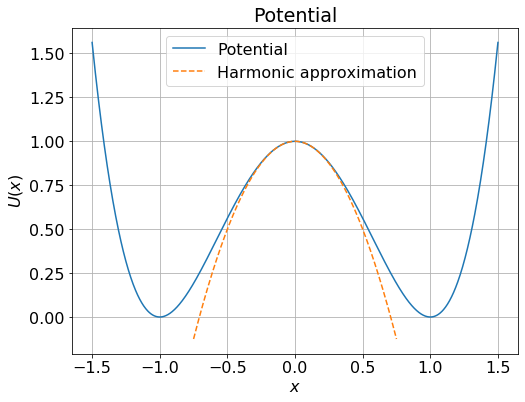

In [3]:
x = np.linspace(-1.5,1.5,1000)
plt.figure(figsize=(8,6))
matplotlib.rcParams.update({'font.size': 16})
plt.plot(x,potential(x,1.0), label='Potential')
x = np.linspace(-0.75,0.75,1000)
plt.plot(x,(1.0-2.0*x**2), '--',label='Harmonic approximation')
plt.title('Potential')
plt.xlabel(r'$x$')
plt.ylabel(r'$U(x)$')
plt.legend()
plt.grid()
plt.show()

## Committor guesses

Borders of the states

In [4]:
S = 0.8

In [5]:
@njit(fastmath=True)
def qLin(x, KbT, u0=1.0):
    if x<-S:
        return 0.0
    elif x>S:
        return 1.0
    else:
        return (x+S)/(2.0*S)
    
@njit(fastmath=True)
def dqLin(x, KbT, u0=1.0):
    if x<-S:
        return 0.0
    elif x>S:
        return 0.0
    else:
        return 1.0/(2.0*S)
   
@njit(fastmath=True)
def qQuadr(x, KbT, u0=1.0):
    if x<-S:
        return 0.0
    elif x>S:
        return 1.0
    else:
        return (x+S)**2/(4.0*S**2)

@njit(fastmath=True)
def dqQuadr(x, KbT, u0=1.0):
    if x<-S:
        return 0.0
    elif x>S:
        return 0.0
    else:
        return (x+S)/(2.0*S**2)
 
@njit(fastmath=True)
def qCub(x, KbT, u0=1.0):
    if x<-S:
        return 0.0
    elif x>S:
        return 1.0
    else:
        return (x+S)**3/(8.0*S**3)

@njit(fastmath=True)
def dqCub(x, KbT, u0=1.0):
    if x<-S:
        return 0.0
    elif x>S:
        return 0.0
    else:
        return 3*(x+S)**2/(8.0*S**3)
    
@njit(fastmath=True)
def qExp(x, KbT, u0=1.0):
    if x<-S:
        return 0.0
    elif x>S:
        return 1.0
    else:
        return (np.exp((x+S)/(2.0*S))-1.0)/(np.exp(1.0)-1.0)

@njit(fastmath=True)
def dqExp(x, KbT, u0=1.0):
    if x<-S:
        return 0.0
    elif x>S:
        return 0.0
    else:
        return (np.exp((x+S)/(2.0*S)))/(2.0*S)/(np.exp(1.0)-1.0)
    
@njit(fastmath=True)
def qLog(x, KbT, u0=1.0):
    if x<-S:
        return 0.0
    elif x>S:
        return 1.0
    else:
        return np.log(x/S+2.0)/np.log(3.0)

@njit(fastmath=True)
def dqLog(x, KbT, u0=1.0):
    if x<-S:
        return 0.0
    elif x>S:
        return 0.0
    else:
        return 1.0/(np.log(3.0)*(x/S+2.0)*S)
    
@njit(fastmath=True)
def qSqrt(x, KbT, u0=1.0):
    if x<-S:
        return 0.0
    elif x>S:
        return 1.0
    else:
        return np.sqrt((x+S)/(2.0*S))

@njit(fastmath=True)
def dqSqrt(x, KbT, u0=1.0):
    if x<-S:
        return 0.0
    elif x>S:
        return 0.0
    else:
        return 1.0/(2.0*np.sqrt((x+S)*(2.0*S)))
    
A=5.0
@njit(fastmath=True)
def qAtan(x, KbT, u0=1.0):
    if x<-S:
        return 0.0
    elif x>S:
        return 1.0
    else:
        return 0.5*(np.arctan(5.0*x/S)-np.arctan(-5.0/S))/np.arctan(5.0/S)

@njit(fastmath=True)
def dqAtan(x, KbT, u0=1.0):
    if x<-S:
        return 0.0
    elif x>S:
        return 0.0
    else:
        return 2.5/((5.0*x/S)**2+1.0)/(np.arctan(5.0/S))/S
    
#@njit(fastmath=True)
def qHarm(x, KbT, u0=1.0):
    if x<-S:
        return 0.0
    elif x>S:
        return 1.0
    else:
        tmp = np.sqrt(2.0*u0/KbT)
        return 0.5/special.erf(tmp*S)*(special.erf(tmp*x)+special.erf(tmp*S))
  
#@njit(fastmath=True)
def dqHarm(x, KbT, u0=1.0):
    if x<-S:
        return 0.0
    elif x>S:
        return 0.0
    else:
        tmp = np.sqrt(2.0*u0/KbT)
        return tmp*np.exp(-(tmp*x)**2)/(np.pi**0.5*special.erf(tmp*S))
    
    
@njit(fastmath=True)
def LI(q0=None, u0=1.0, dt = 0.01, KbT = 1.0, seed=None, isteps = 4000):
    # I set a random seed if not stated otherwise
    if seed is not None:
        np.random.seed(seed)
    # Define preliminary variables
    q = np.empty(isteps, dtype=np.float64)
    q_trans = np.empty(isteps, dtype=np.float64)
    if q0 is not None:
        q[0] = q0
    else:
        q[0] = -1.0+np.sqrt(KbT/(8.0*u0))
    # Diffusion coefficient
    D = np.sqrt(2.0*KbT*dt)
    # Index for the transition trajectory
    j = 0
    for i in range(isteps-1):
        # Evaluate evolution of the system
        f = force(q[i], u0)
        q[i+1] = q[i]+f*dt+D*np.random.normal(0,1)
        if q[i+1] > -S and q[i+1]<S:
            q_trans[j] = q[i+1]
            j+=1
    return q, q_trans[:j-1]

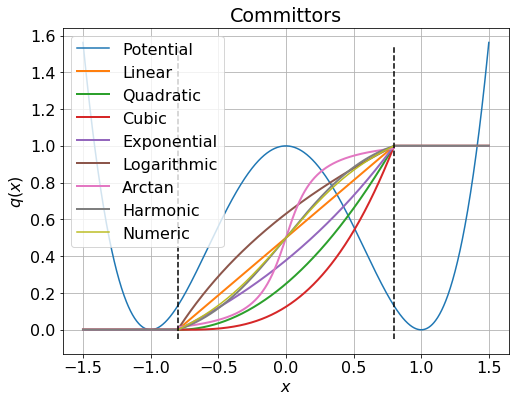

In [6]:
KBT = 1.0
x = np.linspace(-1.5,1.5,1000)
y = np.zeros_like(x)
plt.figure(figsize=(8,6))
matplotlib.rcParams.update({'font.size': 16})
plt.plot(x,potential(x,1.0), label='Potential')
# LINEAR
for i in range(len(x)):
    y[i] = qLin(x[i], KbT = KBT)
plt.plot(x,y,linewidth=2.0,label ='Linear')
# QUADRATIC
for i in range(len(x)):
    y[i] = qQuadr(x[i], KbT = KBT)
plt.plot(x,y,linewidth=2.0,label='Quadratic')
# CUBIC
for i in range(len(x)):
    y[i] = qCub(x[i], KbT = KBT)
plt.plot(x,y,linewidth=2.0,label='Cubic')
# EXPONENTIAL
for i in range(len(x)):
    y[i] = qExp(x[i], KbT = KBT)
plt.plot(x,y,linewidth=2.0,label='Exponential')
# LOGARITHMIC
for i in range(len(x)):
    y[i] = qLog(x[i], KbT = KBT)
plt.plot(x,y,linewidth=2.0,label='Logarithmic')
# SQUARE ROOT
for i in range(len(x)):
    y[i] = qSqrt(x[i], KbT = KBT)
#plt.plot(x,y,linewidth=2.0,label='Square root')
# ARCTAN
for i in range(len(x)):
    y[i] = qAtan(x[i], KbT = KBT)
plt.plot(x,y,linewidth=2.0,label='Arctan')
# HARMONIC
for i in range(len(x)):
    y[i] = qHarm(x[i], KbT = KBT)
plt.plot(x,y,linewidth=2.0,label='Harmonic')
# NUMERICAL INTEGRATION
x = np.linspace(-S, S, 1000)
y = np.exp((x**2-1.0)**2/KBT)
y_int = integrate.cumtrapz(y, x, initial=0)
norm = y_int[-1]
y_int /= norm
plt.plot(x, y_int,label='Numeric')

plt.plot(-S*np.ones(2),np.linspace(-0.05,1.55,2),"k--")
plt.plot(S*np.ones(2),np.linspace(-0.05,1.55,2),"k--")
plt.title('Committors')
plt.xlabel(r'$x$')
plt.ylabel(r'$q(x)$')
plt.legend()
plt.grid()
plt.show()

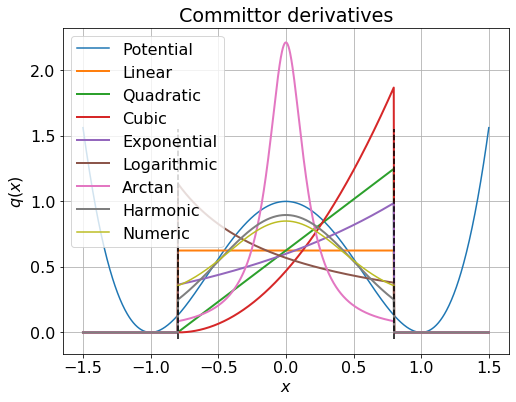

In [7]:
KBT = 1.0
x = np.linspace(-1.5,1.5,1000)
y = np.zeros_like(x)
plt.figure(figsize=(8,6))
matplotlib.rcParams.update({'font.size': 16})
plt.plot(x,potential(x,1.0), label='Potential')
# LINEAR
for i in range(len(x)):
    y[i] = dqLin(x[i], KbT = KBT)
plt.plot(x,y,linewidth=2.0,label ='Linear')
# QUADRATIC
for i in range(len(x)):
    y[i] = dqQuadr(x[i], KbT = KBT)
plt.plot(x,y,linewidth=2.0,label='Quadratic')
# CUBIC
for i in range(len(x)):
    y[i] = dqCub(x[i], KbT = KBT)
plt.plot(x,y,linewidth=2.0,label='Cubic')
# EXPONENTIAL
for i in range(len(x)):
    y[i] = dqExp(x[i], KbT = KBT)
plt.plot(x,y,linewidth=2.0,label='Exponential')
# LOGARITHMIC
for i in range(len(x)):
    y[i] = dqLog(x[i], KbT = KBT)
plt.plot(x,y,linewidth=2.0,label='Logarithmic')
# SQUARE ROOT
x = np.linspace(-0.95,1.5,1000)
for i in range(len(x)):
    y[i] = dqSqrt(x[i], KbT = KBT)
#plt.plot(x,y,linewidth=2.0,label='Square root')
# ARCTAN
x = np.linspace(-1.5,1.5,1000)
for i in range(len(x)):
    y[i] = dqAtan(x[i], KbT = KBT)
plt.plot(x,y,linewidth=2.0,label='Arctan')
# HARMONIC
for i in range(len(x)):
    y[i] = dqHarm(x[i], KbT = KBT)
plt.plot(x,y,linewidth=2.0,label='Harmonic')
# NUMERIC
x = np.linspace(-S,S,1000)
for i in range(len(x)):
    y[i] = np.exp((x[i]**2-1.0)**2/KBT)/norm
plt.plot(x, y,label='Numeric')

plt.plot(-S*np.ones(2),np.linspace(-0.05,1.55,2),"k--")
plt.plot(S*np.ones(2),np.linspace(-0.05,1.55,2),"k--")
plt.title('Committor derivatives')
plt.xlabel(r'$x$')
plt.ylabel(r'$q(x)$')
plt.legend()
plt.grid()
plt.show()

Check if derivatives of guess committor are correct

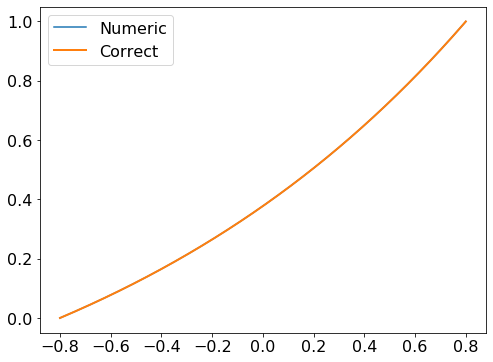

In [8]:
plt.figure(figsize=(8,6))
matplotlib.rcParams.update({'font.size': 16})
x = np.linspace(-S,S,1000)
for i in range(len(x)):
    y[i] = dqExp(x[i], KbT = KBT)
    #y[i] = np.exp((x[i]**2-1.0)**2/KBT)/norm
y_int = integrate.cumtrapz(y, x, initial=0)
plt.plot(x, y_int,label='Numeric')
for i in range(len(x)):
    y[i] = qExp(x[i], KbT = KBT)
#y = np.exp((x**2-1.0)**2/KBT)
#y_int = integrate.cumtrapz(y, x, initial=0)
#y_int /= y_int[-1]
#plt.plot(x,y_int,linewidth=2.0,label='Correct')
plt.plot(x,y,linewidth=2.0,label='Correct')
plt.legend()
plt.show()

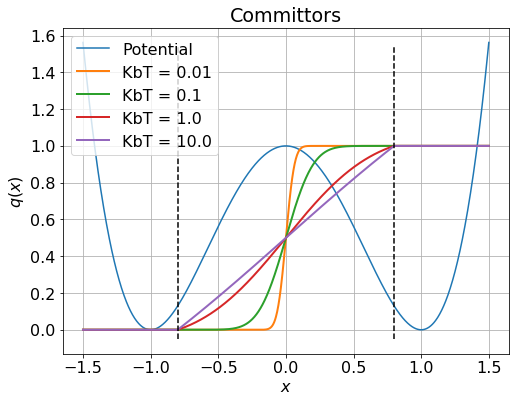

In [9]:
x = np.linspace(-1.5,1.5,1000)
y = np.zeros_like(x)
plt.figure(figsize=(8,6))
matplotlib.rcParams.update({'font.size': 16})
plt.plot(x,potential(x,1.0), label='Potential')
# HARMONIC
for i in range(len(x)):
    y[i] = qHarm(x[i], KbT = 0.01)
plt.plot(x,y,linewidth=2.0,label='KbT = 0.01')
# HARMONIC
for i in range(len(x)):
    y[i] = qHarm(x[i], KbT = 0.1)
plt.plot(x,y,linewidth=2.0,label='KbT = 0.1')
# HARMONIC
for i in range(len(x)):
    y[i] = qHarm(x[i], KbT = 1.0)
plt.plot(x,y,linewidth=2.0,label='KbT = 1.0')
# HARMONIC
for i in range(len(x)):
    y[i] = qHarm(x[i], KbT = 10.0)
plt.plot(x,y,linewidth=2.0,label='KbT = 10.0')

plt.plot(-S*np.ones(2),np.linspace(-0.05,1.55,2),"k--")
plt.plot(S*np.ones(2),np.linspace(-0.05,1.55,2),"k--")
plt.title('Committors')
plt.xlabel(r'$x$')
plt.ylabel(r'$q(x)$')
plt.legend()
plt.grid()
plt.show()

## Sampling the transition region

In [10]:
@njit(fastmath=True)
def I(c,M):
    Iout=0.0
    for i in range(len(c)):
        for j in range(len(c)):
            Iout += M[i,j]*c[i]*c[j]
    return Iout

@njit(fastmath=True,parallel=True)
def I_der(c,M):
    Iout = np.zeros_like(c)
    for i in range(len(c)):
        for j in range(len(c)):
            Iout[i] += M[i,j]*c[j]
    return 2.0*Iout

@njit
def I_hess(c,M):
    return 2.0*M

In [11]:
#@njit(fastmath=True)
def ListGuess(n, q, KbT, u0=1.0):
    if n == 0:
        return qLin(q, KbT, u0=u0)
    elif n == 1:
        return qQuadr(q, KbT, u0=u0)
    elif n == 2:
        return qCub(q, KbT, u0=u0)
    elif n == 3:
        return qExp(q, KbT, u0=u0)
    elif n == 4:
        return qLog(q, KbT, u0=u0)
    elif n == 5:
        return qAtan(q, KbT, u0=u0)
    else:
        return qHarm(q, KbT, u0=u0)
    
#@njit(fastmath=True)
def ListdGuess(n, q, KbT, u0=1.0):
    if n == 0:
        return dqLin(q, KbT, u0=u0)
    elif n == 1:
        return dqQuadr(q, KbT, u0=u0)
    elif n == 2:
        return dqCub(q, KbT, u0=u0)
    elif n == 3:
        return dqExp(q, KbT, u0=u0)
    elif n == 4:
        return dqLog(q, KbT, u0=u0)
    elif n == 5:
        return dqAtan(q, KbT, u0=u0)
    else:
        return dqHarm(q, KbT, u0=u0)

In [12]:
def committor_plotter(c, KbT, u0):
    n = len(c)
    x = np.linspace(-1.5,1.5,1000)
    y = np.zeros_like(x)
    plt.figure(figsize=(8,6))
    matplotlib.rcParams.update({'font.size': 16})
    plt.plot(x,potential(x,1.0), label='Potential')
    for i in range(len(x)):
        for j in range(n):
            y[i]+= c[j]*ListGuess(j, x[i], KbT, u0)
            
    plt.plot(x,y,linewidth=2.0,label='Variational result')
    # NUMERICAL INTEGRATION
    x = np.linspace(-S, S, 1000)
    y = np.exp((x**2-1.0)**2/KbT)
    y_int = integrate.cumtrapz(y, x, initial=0)
    norm = y_int[-1]
    y_int /= norm
    plt.plot(x, y_int,label='Numeric')
    plt.plot(-S*np.ones(2),np.linspace(-0.05,1.55,2),"k--")
    plt.plot(S*np.ones(2),np.linspace(-0.05,1.55,2),"k--")
    plt.title('Committors')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$q(x)$')
    plt.legend()
    plt.grid()
    plt.show()

In [13]:
n = 6

Initial distribution compared to the potential.

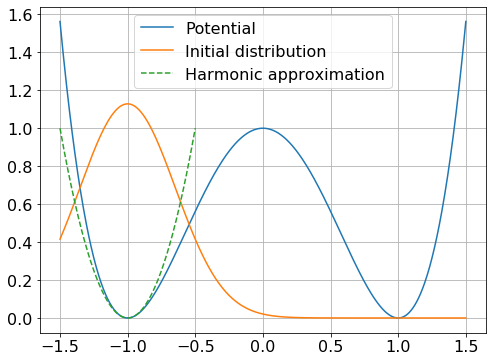

In [14]:
KBT = 1.0
D = np.sqrt(2.0*KBT)
x = np.linspace(-1.5,1.5,1000)
y = np.zeros_like(x)
plt.figure(figsize=(8,6))
matplotlib.rcParams.update({'font.size': 16})
plt.plot(x,potential(x,1.0), label='Potential')
plt.plot(x,2.0/np.sqrt(np.pi*KBT)*np.exp(-4.0*(x+1)**2/KBT), label='Initial distribution')
x = np.linspace(-1.5,-0.5,1000)
plt.plot(x,4.0*1.0*(x+1)**2, '--',label='Harmonic approximation')
plt.legend()
plt.grid()
plt.show()

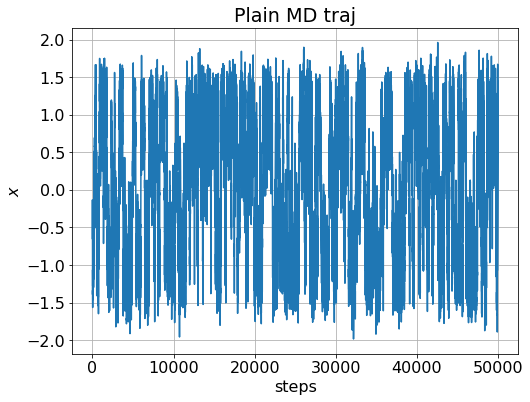

In [15]:
traj, traj_trans = LI(u0=1.0, KbT=1.0, seed = 42, isteps= 50000)
plt.figure(figsize=(8,6))
matplotlib.rcParams.update({'font.size': 16})
plt.plot(traj)
plt.title('Plain MD traj')
plt.xlabel('steps')
plt.ylabel(r'$x$')
plt.grid()
plt.show()

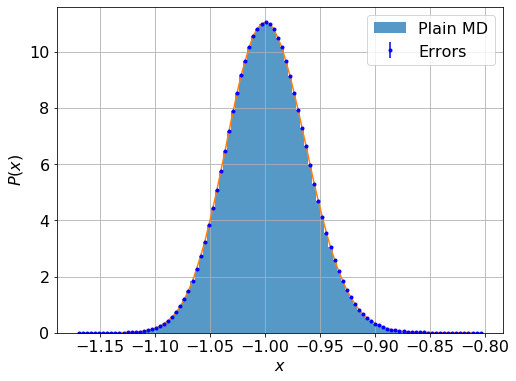

In [16]:
Ncycles = 10000000
KBT = 0.01
U0 = 1.0
D = np.sqrt(2.0*KBT)
traj, traj_trans = LI(q0=-1.0, u0=U0, KbT=KBT, seed=42, isteps= Ncycles)
N = traj_trans.shape[0]

plt.figure(figsize=(8,6))
matplotlib.rcParams.update({'font.size': 16})
n_hist, bins, patches = plt.hist(traj, 100, density=True, alpha=0.75, label = 'Plain MD')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.errorbar(bin_centers, n_hist, yerr=np.sqrt(n_hist/N), fmt='b.', elinewidth=1.5, label='Errors')
plt.plot(bin_centers,n_hist)
# draw errobars, use the sqrt error. You can use what you want there
# poissonian 1 sigma intervals would make more sense
plt.xlabel(r'$x$')
plt.ylabel(r'$P(x)$')
plt.grid()
plt.legend()
plt.show()

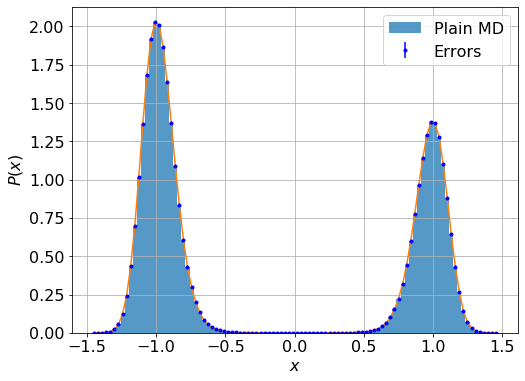

In [17]:
Ncycles = 10000000
KBT = 0.1
U0 = 1.0
D = np.sqrt(2.0*KBT)
traj, traj_trans = LI(q0=-1.0, u0=U0, KbT=KBT, seed=42, isteps= Ncycles)
N = traj_trans.shape[0]

plt.figure(figsize=(8,6))
matplotlib.rcParams.update({'font.size': 16})
n_hist, bins, patches = plt.hist(traj, 100, density=True, alpha=0.75, label = 'Plain MD')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.errorbar(bin_centers, n_hist, yerr=np.sqrt(n_hist/N), fmt='b.', elinewidth=1.5, label='Errors')
plt.plot(bin_centers,n_hist)
# draw errobars, use the sqrt error. You can use what you want there
# poissonian 1 sigma intervals would make more sense
plt.xlabel(r'$x$')
plt.ylabel(r'$P(x)$')
plt.grid()
plt.legend()
plt.show()

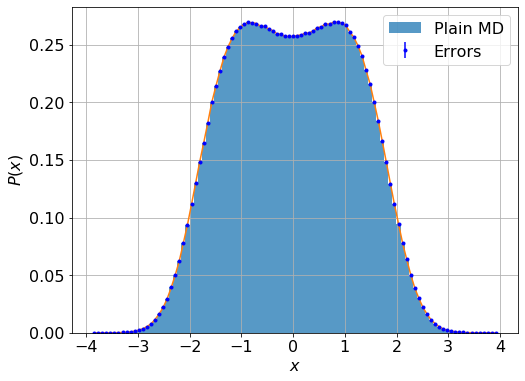

In [18]:
Ncycles = 10000000
KBT = 10.0
U0 = 1.0
D = np.sqrt(2.0*KBT)
traj, traj_trans = LI(q0=-1.0, u0=U0, KbT=KBT, seed=42, isteps= Ncycles)
N = traj_trans.shape[0]

plt.figure(figsize=(8,6))
matplotlib.rcParams.update({'font.size': 16})
n_hist, bins, patches = plt.hist(traj, 100, density=True, alpha=0.75, label = 'Plain MD')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.errorbar(bin_centers, n_hist, yerr=np.sqrt(n_hist/N), fmt='b.', elinewidth=1.5, label='Errors')
plt.plot(bin_centers,n_hist)
# draw errobars, use the sqrt error. You can use what you want there
# poissonian 1 sigma intervals would make more sense
plt.xlabel(r'$x$')
plt.ylabel(r'$P(x)$')
plt.grid()
plt.legend()
plt.show()

In [19]:
Ncycles = 10000000
KBT = 1.0
U0 = 1.0
D = np.sqrt(2.0*KBT)
traj, traj_trans = LI(q0=-1.0, u0=U0, KbT=KBT, seed=42, isteps= Ncycles)

In [20]:
print(traj.shape[0])
print(traj_trans.shape[0])
N = traj_trans.shape[0]

10000000
4488393


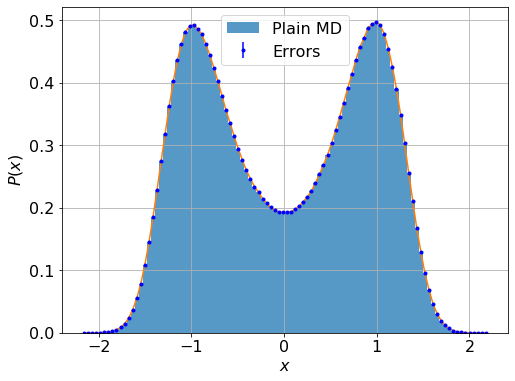

In [21]:
plt.figure(figsize=(8,6))
matplotlib.rcParams.update({'font.size': 16})
n_hist, bins, patches = plt.hist(traj, 100, density=True, alpha=0.75, label = 'Plain MD')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.errorbar(bin_centers, n_hist, yerr=np.sqrt(n_hist)/N, fmt='b.', elinewidth=1.5, label='Errors')
plt.plot(bin_centers,n_hist)
# draw errobars, use the sqrt error. You can use what you want there
# poissonian 1 sigma intervals would make more sense
plt.xlabel(r'$x$')
plt.ylabel(r'$P(x)$')
plt.grid()
plt.legend()
plt.show()

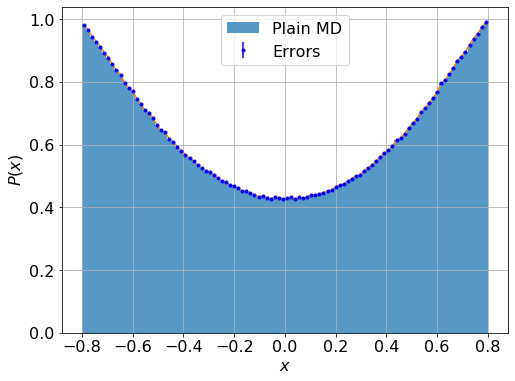

In [22]:
plt.figure(figsize=(8,6))
matplotlib.rcParams.update({'font.size': 16})
n_hist, bins, patches = plt.hist(traj_trans, 100, density=True, alpha=0.75, label = 'Plain MD')
bin_centers = 0.5*(bins[:-1] + bins[1:])
plt.errorbar(bin_centers, n_hist, yerr=np.sqrt(n_hist)/N, fmt='b.', elinewidth=1.5, label='Errors')
plt.plot(bin_centers,n_hist)
# draw errobars, use the sqrt error. You can use what you want there
# poissonian 1 sigma intervals would make more sense
plt.xlabel(r'$x$')
plt.ylabel(r'$P(x)$')
plt.grid()
plt.legend()
plt.show()

In [23]:
print(n)

6


In [24]:
# Precompute the derivatives of the committors
y = np.zeros((N,n))
for i in range(N):
    for j in range(n):
        y[i,j] = ListdGuess(j, traj_trans[i], KbT=KBT, u0=U0)

In [25]:
M = np.zeros((n,n))
for k in range(N):
    for i in range(n):
        for j in range(n):        
            M[i,j] += y[k,i]*y[k,j]
M *= (D/len(traj_trans))
print(M)

[[0.55242717 0.55329665 0.58836883 0.55849545 0.56527456 0.42125583]
 [0.55329665 0.78449178 0.93499291 0.67293154 0.44040721 0.42137825]
 [0.58836883 0.93499291 1.1757595  0.77020195 0.42514306 0.36216758]
 [0.55849545 0.67293154 0.77020195 0.62142698 0.51136793 0.41170223]
 [0.56527456 0.44040721 0.42514306 0.51136793 0.65209631 0.39940858]
 [0.42125583 0.42137825 0.36216758 0.41170223 0.39940858 0.77252192]]


In [26]:
# Matrices used for the minimization procedure
A = [1.0 for i in range(n)]
B = [0.0 for i in range(n)]
# Minimization procedure
c = [1.0/n for i in range(n)]
cout = minimize(I, c, M, method='trust-constr', jac=I_der, hess=I_hess,constraints=LinearConstraint(A, 1.0, 1.0),options={'verbose': 0}, bounds=Bounds(B, A))
print(cout.x)

[7.23491956e-01 2.19147718e-03 3.15260403e-04 1.57019450e-03
 3.65163596e-04 2.72065948e-01]


In [27]:
def Sampling_Variation(n, KbT, u0):
    D = np.sqrt(2.0*KBT)
    traj, traj_trans = LI(q0=-1.0, u0=u0, KbT=KbT, seed=42,isteps= 10000000)
    # Precompute the derivatives of the committors
    y = np.zeros((len(traj_trans),n))
    for j in range(n):
        for i in range(len(traj_trans)):
            y[i,j] = ListdGuess(j, traj_trans[i], KbT, u0=u0)
    M = np.zeros((n,n))
    for k in range(len(traj_trans)):
        for i in range(n):
            for j in range(n):        
                M[i,j] += y[k,i]*y[k,j]
    M *= (D/len(traj_trans))
    # Matrices used for the minimization procedure
    A = [1.0 for i in range(n)]
    B = [0.0 for i in range(n)]
    # Minimization procedure
    c = [1.0/n for i in range(n)]
    cout = minimize(I, c, M, method='trust-constr', jac=I_der, hess=I_hess,constraints=LinearConstraint(A, 1.0, 1.0),options={'verbose': 0}, bounds=Bounds(B, A))
    print("c:=", cout.x)
    print("I:=", I(cout.x,M))
    
    return cout.x, traj_trans.shape[0]

In [28]:
c, N =  Sampling_Variation(6, KbT=KBT, u0=U0)

c:= [7.23491956e-01 2.19147718e-03 3.15260403e-04 1.57019450e-03
 3.65163596e-04 2.72065948e-01]
I:= 0.5167825342058643


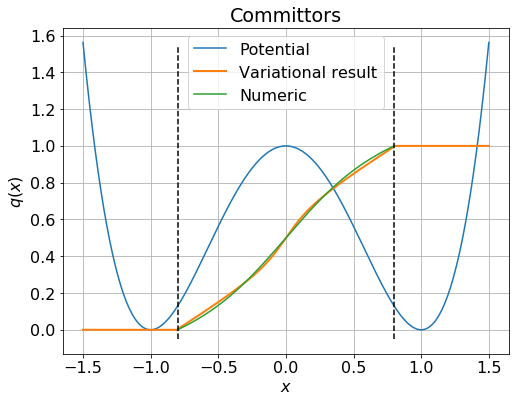

In [29]:
committor_plotter(c, KBT, U0)

## Exact integration

In [30]:
def Numerical_Variation(n, KbT, u0, N):
    D = np.sqrt(2.0*KbT)
    
    # Numerical integration
    x = np.linspace(-S, S, N)
    # Precompute the Gibbs distribution
    Gibbs = np.exp(-U0*(x**2-1.0)**2/KbT)
    # Precompute the derivatives of the committors
    y = np.zeros((len(x),n))
    for j in range(n):
        for i in range(len(x)):
            y[i,j] = ListdGuess(j, x[i], KbT, u0=u0)
    # Canonical partition function
    Z = np.trapz(Gibbs,x)
    Gibbs /= Z
    y_tmp = np.zeros_like(x)
    M = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            for k in range(len(y)):
                y_tmp[k] = y[k,i]*y[k,j]*Gibbs[k]
            M[i,j] = np.trapz(y_tmp,x)
    M *= D
    
    # Matrices used for the minimization procedure
    A = [1.0 for i in range(n)]
    B = [0.0 for i in range(n)]
    # Minimization procedure
    c = [1.0/n for i in range(n)]
    cout = minimize(I, c, M, method='trust-constr', jac=I_der, hess=I_hess,constraints=LinearConstraint(A, 1.0, 1.0),options={'verbose': 0}, bounds=Bounds(B, A))
    print("c:=", cout.x)
    print("I:=", I(cout.x,M))
    
    return cout.x

In [31]:
# Numerical integration
x = np.linspace(-S, S, N)
# Precompute the Gibbs distribution
Gibbs = np.exp(-U0*(x**2-1.0)**2/KBT)
# Precompute the derivatives of the committors
y = np.zeros((len(x),n))
for j in range(n):
    for i in range(len(x)):
        y[i,j] = ListdGuess(j, x[i], KbT=KBT, u0=U0)
# Canonical partition function
Z = np.trapz(Gibbs,x)
Gibbs /= Z

In [32]:
y_tmp = np.zeros_like(x)
M = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        for k in range(len(y)):
            y_tmp[k] = y[k,i]*y[k,j]*Gibbs[k]
        M[i,j] = np.trapz(y_tmp,x)
M *= D
print(M)

[[0.55242717 0.55242717 0.5882024  0.55825112 0.56621952 0.419132  ]
 [0.55242717 0.78426987 0.93596644 0.67253321 0.43946224 0.419132  ]
 [0.5882024  0.93596644 1.17833608 0.7707807  0.42466464 0.36045478]
 [0.55825112 0.67253321 0.7707807  0.62128274 0.51160372 0.40961398]
 [0.56621952 0.43946224 0.42466464 0.51160372 0.65470601 0.39758282]
 [0.419132   0.419132   0.36045478 0.40961398 0.39758282 0.76801309]]


In [33]:
# Matrices used for the minimization procedure
A = [1.0 for i in range(n)]
B = [0.0 for i in range(n)]
# Minimization procedure
c = [1.0/n for i in range(n)]
cout = minimize(I, c, M, method='trust-constr', jac=I_der, hess=I_hess,constraints=LinearConstraint(A, 1.0, 1.0),options={'verbose': 0}, bounds=Bounds(B, A))
print(cout.x)

[7.20997973e-01 1.54652829e-03 1.12182472e-04 5.51415120e-04
 2.80942286e-04 2.76510959e-01]


c:= [7.20997973e-01 1.54652829e-03 1.12182472e-04 5.51415120e-04
 2.80942286e-04 2.76510959e-01]
I:= 0.5155853534607835


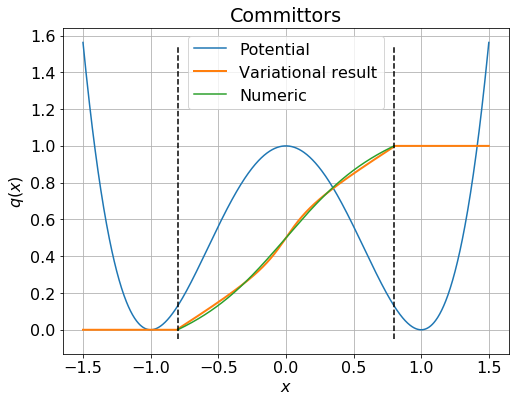

In [34]:
c = Numerical_Variation(n, KBT, U0, N)
committor_plotter(c, KBT, U0)

KbT = 0.1, u0 = 1.0
Sampling
c:= [6.61652541e-05 7.19549900e-05 3.87607666e-05 6.02075552e-05
 3.35766584e-05 9.99729335e-01]
I:= 0.018309945089122998


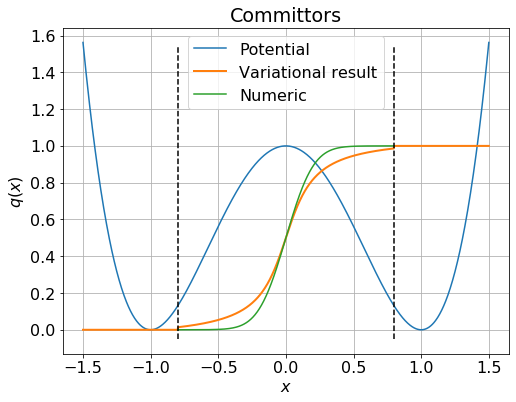

Numerical integration
c:= [2.57321232e-04 1.43141138e-04 8.58358302e-05 1.74176471e-04
 2.95984951e-04 9.99043540e-01]
I:= 0.006016210286877604


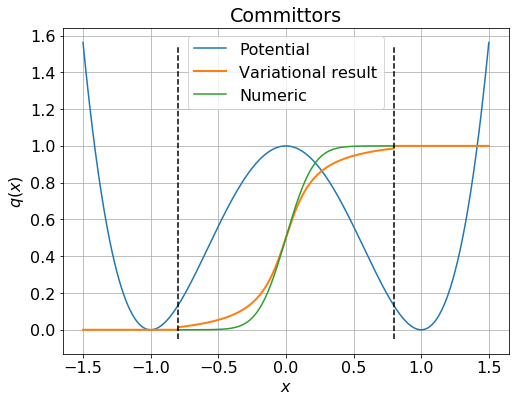

In [35]:
print('KbT = 0.1, u0 = 1.0')
print("Sampling")
c, N =  Sampling_Variation(n, 0.1, 1.0)
committor_plotter(c, 0.1, 1.0)
print("Numerical integration")
c = Numerical_Variation(n, 0.1, 1.0, N)
committor_plotter(c, 0.1, 1.0)

KbT = 1.0, u0 = 1.0
Sampling
c:= [7.23491956e-01 2.19147718e-03 3.15260403e-04 1.57019450e-03
 3.65163596e-04 2.72065948e-01]
I:= 0.5167825342058643


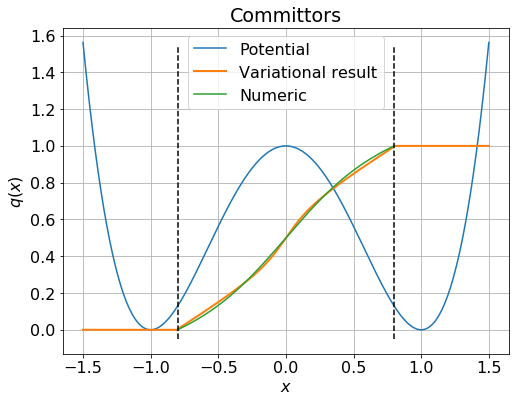

Numerical integration
c:= [7.20997973e-01 1.54652829e-03 1.12182472e-04 5.51415120e-04
 2.80942286e-04 2.76510959e-01]
I:= 0.5155853534607835


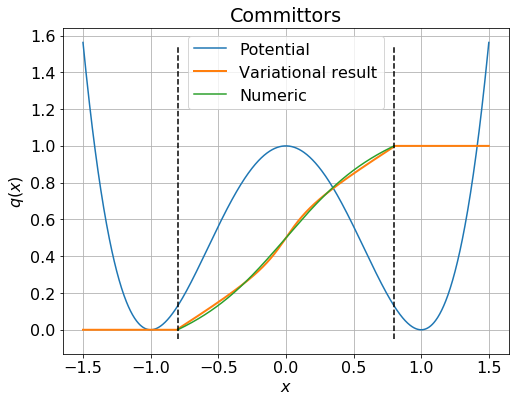

In [36]:
print('KbT = 1.0, u0 = 1.0')
print("Sampling")
c, N =  Sampling_Variation(n, 1.0, 1.0)
committor_plotter(c, 1.0, 1.0)
print("Numerical integration")
c = Numerical_Variation(n, 1.0, 1.0, N)
committor_plotter(c, 1.0, 1.0)

## Some tests

In [37]:
def ListGuess(n, q, KbT, u0=1.0):
    if n == 0:
        return qHarm(q, KbT, u0=u0)
    else:
        return qLin(q, KbT, u0=u0)
    
def ListdGuess(n, q, KbT, u0=1.0):
    if n == 0:
        return dqHarm(q, KbT, u0=u0)
    else:
        return dqLin(q, KbT, u0=u0)

In [38]:
n = 2

KbT = 0.1, u0 = 1.0
Sampling
c:= [0.99556783 0.00443217]
I:= 0.002805815103710487


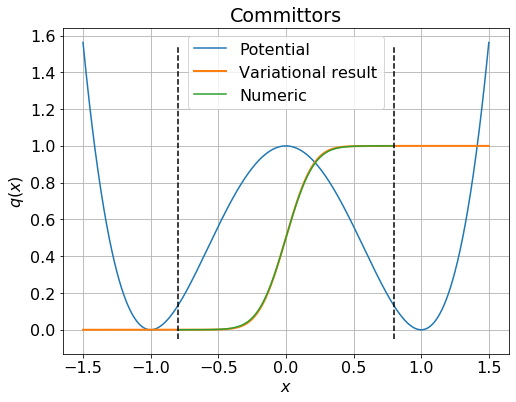

Numerical integration
c:= [0.99216915 0.00783085]
I:= 0.0012241785289065419


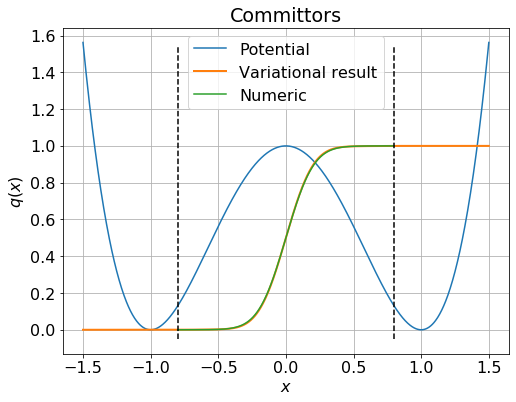

In [39]:
print('KbT = 0.1, u0 = 1.0')
print("Sampling")
c, N =  Sampling_Variation(n, 0.1, 1.0)
committor_plotter(c, 0.1, 1.0)
print("Numerical integration")
c = Numerical_Variation(n, 0.1, 1.0, N)
committor_plotter(c, 0.1, 1.0)

KbT = 1.0, u0 = 1.0
Sampling
c:= [0.75535817 0.24464183]
I:= 0.5136699224924439


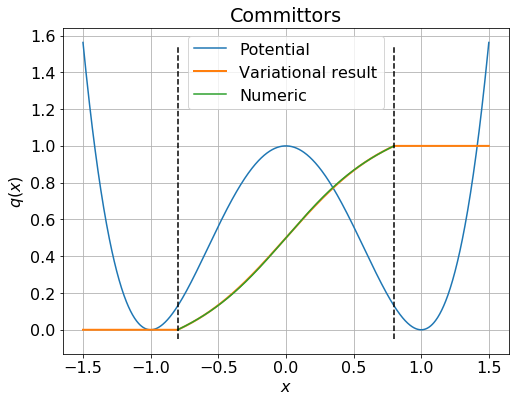

Numerical integration
c:= [0.77255425 0.22744575]
I:= 0.5116128695060875


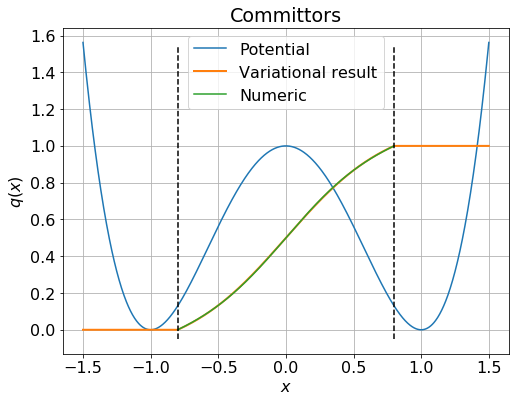

In [40]:
print('KbT = 1.0, u0 = 1.0')
print("Sampling")
c, N =  Sampling_Variation(n, 1.0, 1.0)
committor_plotter(c, 1.0, 1.0)
print("Numerical integration")
c = Numerical_Variation(n, 1.0, 1.0, N)
committor_plotter(c, 1.0, 1.0)

In [41]:
for KBT in [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0]:
    print("Temperature KbT:=", KBT)
    print("Sampling")
    c, N =  Sampling_Variation(n, KBT, U0)
    print("Numerical integration")
    c = Numerical_Variation(n, KBT, U0,N)

Temperature KbT:= 0.01
Sampling
c:= [2.61964713e-04 9.99738035e-01]
I:= 0.055583615375494395
Numerical integration
c:= [0.99483271 0.00516729]
I:= 1.475028298822723e-06
Temperature KbT:= 0.02
Sampling
c:= [0.99536268 0.00463732]
I:= 1.6800595097645023e-06
Numerical integration
c:= [0.99536268 0.00463732]
I:= 1.6800595097687512e-06
Temperature KbT:= 0.05
Sampling
c:= [0.99230907 0.00769093]
I:= 7.307005886848741e-06
Numerical integration
c:= [0.99230826 0.00769174]
I:= 7.694698794475624e-06
Temperature KbT:= 0.1
Sampling
c:= [0.99298695 0.00701305]
I:= 0.0008915275989839727
Numerical integration
c:= [0.99216915 0.00783085]
I:= 0.0012241785289065419
Temperature KbT:= 0.2
Sampling
c:= [0.95433064 0.04566936]
I:= 0.046200438524722144
Numerical integration
c:= [0.9495601 0.0504399]
I:= 0.047676673719958526
Temperature KbT:= 0.5
Sampling
c:= [0.82268736 0.17731264]
I:= 0.29053607925270053
Numerical integration
c:= [0.82703223 0.17296777]
I:= 0.28909571815282054
Temperature KbT:= 1.0
Sampling

In [42]:
KBT = 0.1
for U0 in [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0]:
    print("Temperature u0:=", U0)
    print("Sampling")
    c, N =  Sampling_Variation(n, KBT, U0)
    print("Numerical integration")
    c = Numerical_Variation(n, KBT, U0,N)

Temperature u0:= 0.01
Sampling
c:= [0.7492942 0.2507058]
I:= 0.17455126850669356
Numerical integration
c:= [0.72678802 0.27321198]
I:= 0.17455872673962658
Temperature u0:= 0.02
Sampling
c:= [0.80565039 0.19434961]
I:= 0.17404366769762325
Numerical integration
c:= [0.73316611 0.26683389]
I:= 0.1741566223588948
Temperature u0:= 0.05
Sampling
c:= [0.76988744 0.23011256]
I:= 0.17114745125647732
Numerical integration
c:= [0.74675271 0.25324729]
I:= 0.1713645705478428
Temperature u0:= 0.1
Sampling
c:= [0.77028566 0.22971434]
I:= 0.16180412410940456
Numerical integration
c:= [0.77242643 0.22757357]
I:= 0.16178619546485856
Temperature u0:= 0.2
Sampling
c:= [0.82960932 0.17039068]
I:= 0.1288841685530436
Numerical integration
c:= [0.82698286 0.17301714]
I:= 0.1292875359798875
Temperature u0:= 0.5
Sampling
c:= [0.95543165 0.04456835]
I:= 0.032229674355791015
Numerical integration
c:= [0.94950916 0.05049084]
I:= 0.033712501510303194
Temperature u0:= 1.0
Sampling
c:= [0.99298695 0.00701305]
I:= 0.0

In [43]:
@njit(fastmath=True)
def qAtan1(x, KbT, u0=1.0):
    A=1.0
    if x<-S:
        return 0.0
    elif x>S:
        return 1.0
    else:
        return (np.arctan(A*x)-np.arctan(-A*1.0))/(np.arctan(A*1.0)-np.arctan(-A*1.0))

@njit(fastmath=True)
def dqAtan1(x, KbT, u0=1.0):
    A=1.0
    if x<-S:
        return 0.0
    elif x>S:
        return 0.0
    else:
        return (0.5*A)/((A*x)**2+1.0)/(np.arctan(A))
    
@njit(fastmath=True)
def qAtan2(x, KbT, u0=1.0):
    A=2.0
    if x<-S:
        return 0.0
    elif x>S:
        return 1.0
    else:
        return (np.arctan(A*x)-np.arctan(-A*1.0))/(np.arctan(A*1.0)-np.arctan(-A*1.0))

@njit(fastmath=True)
def dqAtan2(x, KbT, u0=1.0):
    A=2.0
    if x<-S:
        return 0.0
    elif x>S:
        return 0.0
    else:
        return (0.5*A)/((A*x)**2+1.0)/(np.arctan(A))
    
@njit(fastmath=True)
def qAtan5(x, KbT, u0=1.0):
    A=5.0
    if x<-S:
        return 0.0
    elif x>S:
        return 1.0
    else:
        return (np.arctan(A*x)-np.arctan(-A*1.0))/(np.arctan(A*1.0)-np.arctan(-A*1.0))

@njit(fastmath=True)
def dqAtan5(x, KbT, u0=1.0):
    A=5.0
    if x<-S:
        return 0.0
    elif x>S:
        return 0.0
    else:
         return (0.5*A)/((A*x)**2+1.0)/(np.arctan(A))
        
@njit(fastmath=True)
def qAtan10(x, KbT, u0=1.0):
    A=10.0
    if x<-S:
        return 0.0
    elif x>S:
        return 1.0
    else:
        return (np.arctan(A*x)-np.arctan(-A*1.0))/(np.arctan(A*1.0)-np.arctan(-A*1.0))

@njit(fastmath=True)
def dqAtan10(x, KbT, u0=1.0):
    A=10.0
    if x<-S:
        return 0.0
    elif x>S:
        return 0.0
    else:
         return (0.5*A)/((A*x)**2+1.0)/(np.arctan(A))

In [44]:
def ListGuess(n, q, KbT, u0=1.0):
    if n == 0:
        return qHarm(q, KbT, u0=u0)
    if n == 1:
        return qAtan1(q, KbT, u0=u0)
    if n == 2:
        return qAtan2(q, KbT, u0=u0)
    if n == 3:
        return qAtan5(q, KbT, u0=u0)
    if n == 4:
        return qAtan10(q, KbT, u0=u0)
    else:
        return qLin(q, KbT, u0=u0)
    
def ListdGuess(n, q, KbT, u0=1.0):
    if n == 0:
        return dqHarm(q, KbT, u0=u0)
    if n == 1:
        return dqAtan1(q, KbT, u0=u0)
    if n == 2:
        return dqAtan2(q, KbT, u0=u0)
    if n == 3:
        return dqAtan5(q, KbT, u0=u0)
    if n == 4:
        return dqAtan10(q, KbT, u0=u0)
    else:
        return dqLin(q, KbT, u0=u0)

In [45]:
n = 5

In [46]:
for KBT in [0.1, 1.0, 10.0]:
    print("Temperature KbT:=", KBT)
    print("Sampling")
    c, N =  Sampling_Variation(n, KBT, U0)
    print("Numerical integration")
    c = Numerical_Variation(n, KBT, U0,N)

Temperature KbT:= 0.1
Sampling
c:= [9.82990556e-01 9.48223262e-04 1.48026275e-03 3.94749203e-03
 1.06334658e-02]
I:= 1.3830887475984301e-06
Numerical integration
c:= [9.82812351e-01 9.51791491e-04 1.49168156e-03 3.98922092e-03
 1.07549554e-02]
I:= 1.3822297491293232e-06
Temperature KbT:= 1.0
Sampling
c:= [0.96905069 0.00171165 0.00228053 0.00534155 0.02161558]
I:= 0.004330348712710292
Numerical integration
c:= [0.97651156 0.0015253  0.00227744 0.00599941 0.01368629]
I:= 0.0038489232803244093
Temperature KbT:= 10.0
Sampling
c:= [8.15148967e-05 9.99588065e-01 2.25836528e-04 5.27541248e-05
 5.18290252e-05]
I:= 1.2987130316813065
Numerical integration
c:= [9.59109010e-07 9.99206609e-01 2.42994854e-04 2.08896988e-04
 3.40539917e-04]
I:= 1.2119879295628055


In [47]:
KBT = 0.1
for U0 in [0.01, 0.1, 1.0,10.0]:
    print("Temperature u0:=", U0)
    print("Sampling")
    c, N =  Sampling_Variation(n, KBT, U0)
    print("Numerical integration")
    c = Numerical_Variation(n, KBT, U0,N)

Temperature u0:= 0.01
Sampling
c:= [1.07536493e-03 9.95757168e-01 1.91469339e-03 7.02436757e-04
 5.50337193e-04]
I:= 0.13078891498847692
Numerical integration
c:= [1.07847497e-03 9.95777488e-01 1.91180891e-03 6.92907954e-04
 5.39320354e-04]
I:= 0.13082531855679944
Temperature u0:= 0.1
Sampling
c:= [4.35522974e-04 9.95958954e-01 1.38077278e-03 9.80666363e-04
 1.24408382e-03]
I:= 0.12123069233340791
Numerical integration
c:= [1.83373002e-04 9.96358490e-01 1.13029558e-03 9.31862673e-04
 1.39597828e-03]
I:= 0.12122553900581645
Temperature u0:= 1.0
Sampling
c:= [0.97213529 0.00106931 0.00141405 0.00326404 0.0221173 ]
I:= 0.0008838419269506073
Numerical integration
c:= [0.96484417 0.00227605 0.00334883 0.00858243 0.02094851]
I:= 0.0012185022152788867
Temperature u0:= 10.0
Sampling
c:= [9.82990556e-01 9.48223262e-04 1.48026275e-03 3.94749203e-03
 1.06334658e-02]
I:= 1.3830887475984301e-06
Numerical integration
c:= [9.82812351e-01 9.51791491e-04 1.49168156e-03 3.98922092e-03
 1.07549554e-02]
I

## Let's look at the committor results

KbT = 0.1, u0 = 1.0
Sampling
c:= [0.97213529 0.00106931 0.00141405 0.00326404 0.0221173 ]
I:= 0.0008838419269506073


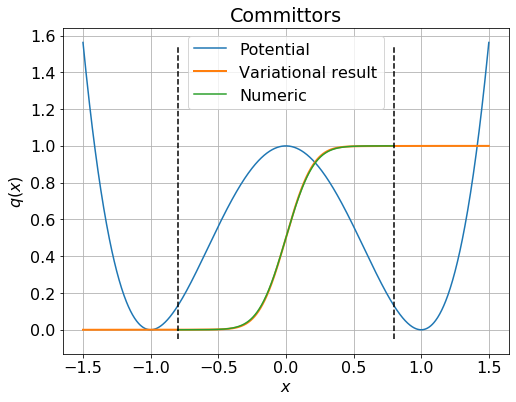

Numerical integration
c:= [9.82953208e-01 9.47266304e-04 1.48144320e-03 3.95602664e-03
 1.06620556e-02]
I:= 1.390183521493364e-06


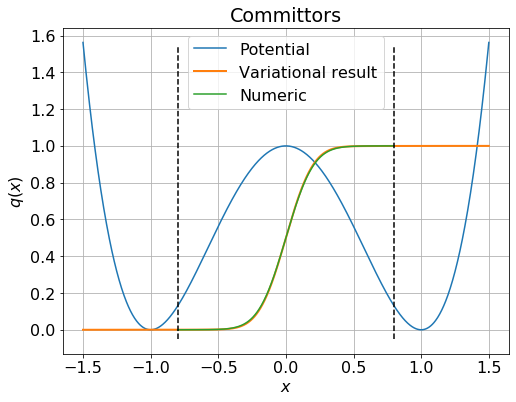

In [48]:
print('KbT = 0.1, u0 = 1.0')
print("Sampling")
c, N =  Sampling_Variation(n, 0.1, 1.0)
committor_plotter(c, 0.1, 1.0)
print("Numerical integration")
c = Numerical_Variation(n, 0.1, 1.0, N)
committor_plotter(c, 0.1, 1.0)

KbT = 1.0, u0 = 1.0
Sampling
c:= [1.82423652e-04 9.96609781e-01 1.08868326e-03 8.63879394e-04
 1.25523304e-03]
I:= 0.12152193420412764


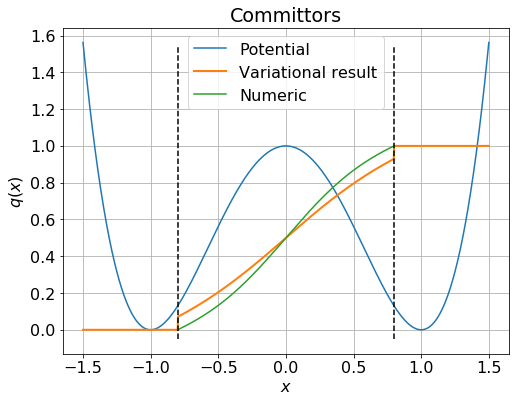

Numerical integration
c:= [3.08018495e-04 2.12419771e-04 2.98531249e-04 6.84189053e-05
 9.99112612e-01]
I:= 0.0096303565337881


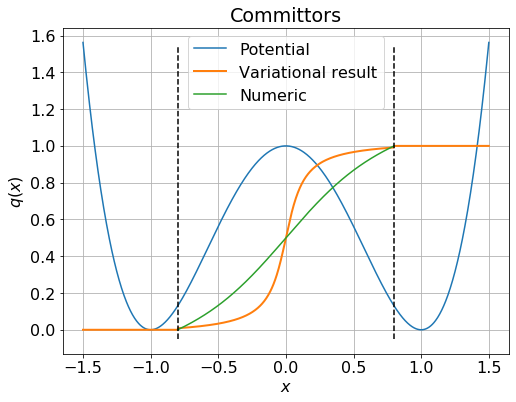

In [49]:
print('KbT = 1.0, u0 = 1.0')
print("Sampling")
c, N =  Sampling_Variation(n, 1.0, 1.0)
committor_plotter(c, 1.0, 1.0)
print("Numerical integration")
c = Numerical_Variation(n, 1.0, 1.0, N)
committor_plotter(c, 1.0, 1.0)